# Introduction to Machine Learning 2
Jevon Heath, Feb 2020

### ~~Linear~~ Logistic Regression: fitting to a ~~line~~ probability curve
Instead of a continuous outcome, we want a categorical response:
* Is this email junk or not?
* Is this a correct usage or not?
* Is the speaker a native speaker or not?
* Is the backchannel in question laughter, non-verbal, phrasal, or substantive?

For these **classification** questions, the outcome should be a specific category.

But a model can also give us the _likelihood_ of that predicted outcome.

#### Assumptions:
* continuous values **for independent variables**
* ~~a linear relationship~~ **linear independent variables**
* ~~multivariate normality~~
* no multicollinearity among independent variables
* ~~homoskedasticity~~
* **independence of observations**
* **a large sample size**

In [1]:
# Turns on/off pretty printing 
%pprint

# Every returned Out[] is displayed, not just the last one. 
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

Pretty printing has been turned OFF


In [2]:
import numpy as np
import pandas as pd
import sklearn               
import nltk 

import matplotlib.pyplot as plt
import seaborn as sns        
sns.set_style('darkgrid')

import statsmodels.api as sm
import statsmodels.formula.api as smf

## Classification: predicting discrete labels

##### Simple case: two labels
Quick example: Given a reaction time, is the participant young or old?

In [3]:
english = pd.read_csv('../../Class-Exercise-Repo/activity3/english_updated.csv', index_col='Index')

In [4]:
english.describe()

,RTlexdec,RTnaming,Familiarity,WrittenFrequency,WrittenSpokenFrequencyRatio,FamilySize,DerivationalEntropy,InflectionalEntropy,NumberSimplexSynsets,NumberComplexSynsets,...,ConfriendsN,ConffV,ConffN,ConfbV,ConfbN,NounFrequency,VerbFrequency,FrequencyInitialDiphoneWord,FrequencyInitialDiphoneSyllable,CorrectLexdec
count,4394.000000,4394.000000,4394.000000,4394.000000,4394.000000,4394.000000,4394.000000,4394.000000,4394.000000,4394.000000,...,4394.000000,4394.000000,4394.000000,4394.000000,4394.000000,4394.000000,4394.000000,4394.000000,4394.000000,4394.000000
mean,6.550684,6.322843,3.796372,5.020491,0.689445,1.811214,0.536752,1.108217,1.699016,1.562105,...,5.248169,0.415286,1.324193,1.560806,3.912158,607.606736,860.991807,10.366159,10.795004,27.023669
std,0.157538,0.178585,1.154754,1.850710,1.164100,0.824997,0.559080,0.568047,0.672941,1.308853,...,2.082621,0.687585,2.422476,1.124702,3.130107,1885.165188,6767.632169,1.577864,1.593374,4.333091
min,6.205325,6.021751,1.100000,0.000000,-6.553933,0.693147,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.091042,3.367296,1.000000
25%,6.424699,6.149109,2.970000,3.761200,-0.064093,1.098612,0.037530,0.728350,1.098612,0.000000,...,4.127134,0.000000,0.000000,0.693147,0.693147,28.000000,0.000000,9.564372,10.002744,27.000000
50%,6.551223,6.342023,3.700000,4.828314,0.688507,1.609438,0.398240,1.073820,1.609438,1.386294,...,5.476464,0.000000,0.000000,1.386294,4.158883,108.000000,28.000000,10.569058,11.000298,29.000000
75%,6.654417,6.490534,4.570000,6.265301,1.459906,2.302585,0.888440,1.628030,2.197225,2.564949,...,6.632002,0.693147,1.386294,2.564949,6.287859,434.000000,159.000000,11.319947,11.709692,30.000000
max,7.187808,6.695675,6.970000,11.356658,5.630714,5.517453,5.207280,2.451410,4.356709,6.111467,...,10.303035,3.332205,10.347436,4.189655,10.599755,35351.000000,242066.000000,13.924902,13.929620,30.000000


In [5]:
english.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4394 entries, 1 to 4567
Data columns (total 36 columns):
RTlexdec                           4394 non-null float64
RTnaming                           4394 non-null float64
Familiarity                        4394 non-null float64
Word                               4394 non-null object
AgeSubject                         4394 non-null object
WordCategory                       4394 non-null object
WrittenFrequency                   4394 non-null float64
WrittenSpokenFrequencyRatio        4394 non-null float64
FamilySize                         4394 non-null float64
DerivationalEntropy                4394 non-null float64
InflectionalEntropy                4394 non-null float64
NumberSimplexSynsets               4394 non-null float64
NumberComplexSynsets               4394 non-null float64
LengthInLetters                    4394 non-null int64
Ncount                             4394 non-null int64
MeanBigramFrequency                4394 non-n

In [6]:
english['AgeSubject'].value_counts()

young    2197
old      2197
Name: AgeSubject, dtype: int64

In [7]:
logit1 = smf.glm("AgeSubject ~ RTlexdec + WrittenFrequency", data=english, family=sm.families.Binomial())

In [8]:
logit1f = logit1.fit()

In [9]:
logit1f.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            Generalized Linear Model Regression Results                             
====================================================================================================
Dep. Variable:     ['AgeSubject[old]', 'AgeSubject[young]']   No. Observations:                 4394
Model:                                                  GLM   Df Residuals:                     4391
Model Family:                                      Binomial   Df Model:                            2
Link Function:                                        logit   Scale:                          1.0000
Method:                                                IRLS   Log-Likelihood:                -1007.4
Date:                                      Tue, 03 Mar 2020   Deviance:                       2014.8
Time:                                              22:59:19   Pearson chi2:                 6.19e+03
No. Iterations:                                           7                                         
Covariance Type:                                  nonrobust                                         
====================================================================================
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept         -211.2127      6.703    -31.510      0.000    -224.350    -198.075
RTlexdec            31.3852      0.996     31.521      0.000      29.434      33.337
WrittenFrequency     1.1391      0.048     23.715      0.000       1.045       1.233
====================================================================================
"""

##### Complicated case: many labels

Now a textbook example using sklearn's pre-loaded data set 20 news group data. 
- For detailed explanation, see the textbook section:
 https://jakevdp.github.io/PythonDataScienceHandbook/05.05-naive-bayes.html
- The original data set can be downloaded from: http://qwone.com/~jason/20Newsgroups/
- sklearn's tutorial on the dataset: https://scikit-learn.org/0.19/datasets/twenty_newsgroups.html

Topic classification is our goal: 
- Given a short text, can we identify topic labels? 

Text-based classification requires converting **INDIVIDUAL WORDS into a their own features**, which blows up feature space. Some common strategies:

- Removing stop words and punctuation (depending on your data and goal) 
- Limiting word types to top 2000K, 5000K, etc. 
- Using "sparse vector" format

In [10]:
from sklearn.datasets import fetch_20newsgroups
data = fetch_20newsgroups()   # downloads training data by default: subset='train'. test', 'all'
data.target_names

['alt.atheism', 'comp.graphics', 'comp.os.ms-windows.misc', 'comp.sys.ibm.pc.hardware', 'comp.sys.mac.hardware', 'comp.windows.x', 'misc.forsale', 'rec.autos', 'rec.motorcycles', 'rec.sport.baseball', 'rec.sport.hockey', 'sci.crypt', 'sci.electronics', 'sci.med', 'sci.space', 'soc.religion.christian', 'talk.politics.guns', 'talk.politics.mideast', 'talk.politics.misc', 'talk.religion.misc']

In [11]:
dir(data)
type(data)

['DESCR', 'data', 'filenames', 'target', 'target_names']

<class 'sklearn.utils.Bunch'>

In [12]:
data.target.shape

(11314,)

In [13]:
data.filenames[:5]

array(['C:\\Users\\Anthony\\scikit_learn_data\\20news_home\\20news-bydate-train\\rec.autos\\102994',
       'C:\\Users\\Anthony\\scikit_learn_data\\20news_home\\20news-bydate-train\\comp.sys.mac.hardware\\51861',
       'C:\\Users\\Anthony\\scikit_learn_data\\20news_home\\20news-bydate-train\\comp.sys.mac.hardware\\51879',
       'C:\\Users\\Anthony\\scikit_learn_data\\20news_home\\20news-bydate-train\\comp.graphics\\38242',
       'C:\\Users\\Anthony\\scikit_learn_data\\20news_home\\20news-bydate-train\\sci.space\\60880'],
      dtype='<U97')

In [14]:
data.data[0]

"From: lerxst@wam.umd.edu (where's my thing)\nSubject: WHAT car is this!?\nNntp-Posting-Host: rac3.wam.umd.edu\nOrganization: University of Maryland, College Park\nLines: 15\n\n I was wondering if anyone out there could enlighten me on this car I saw\nthe other day. It was a 2-door sports car, looked to be from the late 60s/\nearly 70s. It was called a Bricklin. The doors were really small. In addition,\nthe front bumper was separate from the rest of the body. This is \nall I know. If anyone can tellme a model name, engine specs, years\nof production, where this car is made, history, or whatever info you\nhave on this funky looking car, please e-mail.\n\nThanks,\n- IL\n   ---- brought to you by your neighborhood Lerxst ----\n\n\n\n\n"

In [15]:
data.target[:5]

array([ 7,  4,  4,  1, 14])

### We'll download subsections of the data, with four categories only, training and test sections

In [16]:
categories = ['talk.religion.misc', 'soc.religion.christian',
              'sci.space', 'comp.graphics']
train = fetch_20newsgroups(subset='train', categories=categories)
test = fetch_20newsgroups(subset='test', categories=categories)

In [17]:
type(train)
dir(train)

<class 'sklearn.utils.Bunch'>

['DESCR', 'data', 'filenames', 'target', 'target_names']

In [18]:
train.data[3]
# Quick! Which topic is this? 

'From: revdak@netcom.com (D. Andrew Kille)\nSubject: Re: Serbian genocide Work of God?\nOrganization: NETCOM On-line Communication Services (408 241-9760 guest)\nLines: 22\n\nJames Sledd (jsledd@ssdc.sas.upenn.edu) wrote:\n: Are the Serbs doing the work of God?  Hmm...\n\n: I\'ve been wondering if anyone would ever ask the question,\n\n: Are the governments of the United States and Europe not moving\n: to end the ethnic cleansing by the Serbs because the targets are\n: muslims?\n\n: Can/Does God use those who are not following him to accomplish\n: tasks for him?  Esp those tasks that are punative?\n\n: James Sledd\n: no cute sig....  but I\'m working on it.\n\nAre you suggesting that God supports genocide?\nPerhaps the Germans were "punishing" Jews on God\'s behalf?\n\nAny God who works that way is indescribably evil, and unworthy of\nmy worship or faith.\n\nrevdak@netcom.com\n'

In [19]:
train.target[3]

2

In [20]:
train.target_names
train.target_names[train.target[3]]

['comp.graphics', 'sci.space', 'soc.religion.christian', 'talk.religion.misc']

'soc.religion.christian'

In [21]:
train.target[:100]

array([2, 2, 1, 2, 0, 3, 1, 0, 3, 3, 2, 0, 1, 2, 3, 2, 2, 0, 1, 0, 1, 0,
       1, 2, 2, 0, 0, 1, 3, 3, 1, 1, 2, 1, 1, 1, 0, 2, 0, 3, 2, 1, 2, 2,
       2, 1, 1, 1, 1, 2, 3, 3, 1, 0, 1, 2, 3, 2, 2, 2, 0, 3, 1, 1, 2, 3,
       0, 2, 0, 0, 1, 0, 2, 1, 2, 1, 0, 0, 1, 1, 2, 2, 1, 0, 2, 2, 0, 2,
       0, 2, 0, 2, 1, 1, 3, 0, 1, 1, 0, 1], dtype=int64)

In [22]:
len(train.data)
len(test.data)

2153

1432

In [23]:
# The data is not in DataFrame format, but you could shape it into one if you wanted to: 
train_df = pd.DataFrame()
train_df['target'] = train.target
train_df['text'] = train.data
train_df.head()

,target,text
0,2,From: jono@mac-ak-24.rtsg.mot.com (Jon Ogden)\...
1,2,From: MANDTBACKA@finabo.abo.fi (Mats Andtbacka...
2,1,From: mccall@mksol.dseg.ti.com (fred j mccall ...
3,2,From: revdak@netcom.com (D. Andrew Kille)\nSub...
4,0,From: hl7204@eehp22 (H L)\nSubject: Re: Graphi...


### Question: how do you extract & represent word-based features from the text?
- **Bag-of-words** approach: reduce a document to the words it contains
- **Occurrence** features: whether or not each word occurs in a document (0 or 1)
- **Count features**:  how many times each word occurs in a document (0 --) 

In [24]:
toy_df = train_df[:10].copy()   # first 10 rows
toy_df

,target,text
0,2,From: jono@mac-ak-24.rtsg.mot.com (Jon Ogden)\...
1,2,From: MANDTBACKA@finabo.abo.fi (Mats Andtbacka...
2,1,From: mccall@mksol.dseg.ti.com (fred j mccall ...
3,2,From: revdak@netcom.com (D. Andrew Kille)\nSub...
4,0,From: hl7204@eehp22 (H L)\nSubject: Re: Graphi...
5,3,From: dmcgee@uluhe.soest.hawaii.edu (Don McGee...
6,1,From: will@rins.ryukoku.ac.jp (William Reiken)...
7,0,From: bprofane@netcom.com (Gert Niewahr)\nSubj...
8,3,From: dan@Ingres.COM (a Rose arose)\nSubject: ...
9,3,From: joslin@pogo.isp.pitt.edu (David Joslin)\...


In [25]:
# Lowercase and then tokenize
toy_df['tokens'] = toy_df.text.map(lambda x: nltk.word_tokenize(x.lower()))
toy_df

,target,text,tokens
0,2,From: jono@mac-ak-24.rtsg.mot.com (Jon Ogden)\...,"[from, :, jono, @, mac-ak-24.rtsg.mot.com, (, ..."
1,2,From: MANDTBACKA@finabo.abo.fi (Mats Andtbacka...,"[from, :, mandtbacka, @, finabo.abo.fi, (, mat..."
2,1,From: mccall@mksol.dseg.ti.com (fred j mccall ...,"[from, :, mccall, @, mksol.dseg.ti.com, (, fre..."
3,2,From: revdak@netcom.com (D. Andrew Kille)\nSub...,"[from, :, revdak, @, netcom.com, (, d., andrew..."
4,0,From: hl7204@eehp22 (H L)\nSubject: Re: Graphi...,"[from, :, hl7204, @, eehp22, (, h, l, ), subje..."
5,3,From: dmcgee@uluhe.soest.hawaii.edu (Don McGee...,"[from, :, dmcgee, @, uluhe.soest.hawaii.edu, (..."
6,1,From: will@rins.ryukoku.ac.jp (William Reiken)...,"[from, :, will, @, rins.ryukoku.ac.jp, (, will..."
7,0,From: bprofane@netcom.com (Gert Niewahr)\nSubj...,"[from, :, bprofane, @, netcom.com, (, gert, ni..."
8,3,From: dan@Ingres.COM (a Rose arose)\nSubject: ...,"[from, :, dan, @, ingres.com, (, a, rose, aros..."
9,3,From: joslin@pogo.isp.pitt.edu (David Joslin)\...,"[from, :, joslin, @, pogo.isp.pitt.edu, (, dav..."


In [26]:
toy_df['god#'] = toy_df.tokens.map(lambda x: x.count('god'))
toy_df['believe#'] = toy_df.tokens.map(lambda x: x.count('believe'))
toy_df['space#'] = toy_df.tokens.map(lambda x: x.count('space'))
toy_df['computer#'] = toy_df.tokens.map(lambda x: x.count('computer'))
toy_df['graphics#'] = toy_df.tokens.map(lambda x: x.count('graphics'))
toy_df['the#'] = toy_df.tokens.map(lambda x: x.count('the'))
toy_df['you#'] = toy_df.tokens.map(lambda x: x.count('you'))
toy_df['way#'] = toy_df.tokens.map(lambda x: x.count('way'))
toy_df

,target,text,tokens,god#,believe#,space#,computer#,graphics#,the#,you#,way#
0,2,From: jono@mac-ak-24.rtsg.mot.com (Jon Ogden)\...,"[from, :, jono, @, mac-ak-24.rtsg.mot.com, (, ...",0,0,0,0,0,6,0,0
1,2,From: MANDTBACKA@finabo.abo.fi (Mats Andtbacka...,"[from, :, mandtbacka, @, finabo.abo.fi, (, mat...",1,0,1,0,0,3,2,0
2,1,From: mccall@mksol.dseg.ti.com (fred j mccall ...,"[from, :, mccall, @, mksol.dseg.ti.com, (, fre...",0,0,0,0,0,7,3,0
3,2,From: revdak@netcom.com (D. Andrew Kille)\nSub...,"[from, :, revdak, @, netcom.com, (, d., andrew...",6,0,0,0,0,9,1,1
4,0,From: hl7204@eehp22 (H L)\nSubject: Re: Graphi...,"[from, :, hl7204, @, eehp22, (, h, l, ), subje...",0,0,0,0,1,0,0,0
5,3,From: dmcgee@uluhe.soest.hawaii.edu (Don McGee...,"[from, :, dmcgee, @, uluhe.soest.hawaii.edu, (...",0,0,0,0,0,7,0,0
6,1,From: will@rins.ryukoku.ac.jp (William Reiken)...,"[from, :, will, @, rins.ryukoku.ac.jp, (, will...",0,0,0,0,0,1,0,0
7,0,From: bprofane@netcom.com (Gert Niewahr)\nSubj...,"[from, :, bprofane, @, netcom.com, (, gert, ni...",0,0,0,0,0,14,1,0
8,3,From: dan@Ingres.COM (a Rose arose)\nSubject: ...,"[from, :, dan, @, ingres.com, (, a, rose, aros...",3,0,0,0,0,49,2,1
9,3,From: joslin@pogo.isp.pitt.edu (David Joslin)\...,"[from, :, joslin, @, pogo.isp.pitt.edu, (, dav...",2,1,0,0,0,9,14,1


### Now do this for ALL word types in the training data...
- Or, more realistically, we could do this for the _n_ most frequent word types (We'll use 3,000)
- Then, the word-count columns (3,000 of them!) will be `X_train`. Feed that into the Naive Bayes training algorithm...
- But is there a better way?

### Considerations
1. We need to normalize the values: raw counts are sensitive to text length. 
2. Some words are going to be frequent across all topics, just because they are common words ('the', 'way', 'talked')
   - We could filter our function words, but that goes only so far 
   - 'space' will be common in one topic, not so in others. 'god' will be common in two, but not in others. How to better capture this? 
3. The vector is going to be SPARSE: most values will be 0. A DataFrame is not an efficient data structure for this.
4. We don't want to do all this manually, word by word! 

## Under the hood with CounterVectorizer and TF-IDF

#### Count-vectorize, and then TF-IDF
- 3. & 4. as well as tokenization are handled by `CountVectorizer`
- 1. & 2. are addressed by `TfidfTransformer`

A detour: we will take a look at a detailed illustration of CountVectors and TF-IDF:
http://www.pitt.edu/~naraehan/presentation/Movie%20Reviews%20sentiment%20analysis%20with%20Scikit-Learn.html#A-detour:-try-out-CountVectorizer-&-TF-IDF


**TF-IDF (Term Frequency - Inverse Document Frequency)**
- Textbook section on TF-IDF: https://jakevdp.github.io/PythonDataScienceHandbook/05.04-feature-engineering.html#Text-Features
- Better explanation here: http://www.tfidf.com/

### Back to the textbook and our 4 newsgroups. 
-  **Reminder:  Refer to textbook for explanation!! Link up above.** 
- `TfidfVectorizer()` used below is a combination of `CountVectorizer()` and `TfidfTransformer()`. It takes care of:
   - Tokenizes text and gets rid of stop words and punctuation
   - Builds a token count vector 
   - Converts raw token count into TF-IDF (Term Frequency - Inverse Document Frequency)

In [27]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import make_pipeline

# pipeline! See textbook. 
model = make_pipeline(TfidfVectorizer(), MultinomialNB())

In [28]:
# train model
model.fit(train.data, train.target)

# predict labels on test data
labels = model.predict(test.data)

Pipeline(memory=None,
         steps=[('tfidfvectorizer',
                 TfidfVectorizer(analyzer='word', binary=False,
                                 decode_error='strict',
                                 dtype=<class 'numpy.float64'>,
                                 encoding='utf-8', input='content',
                                 lowercase=True, max_df=1.0, max_features=None,
                                 min_df=1, ngram_range=(1, 1), norm='l2',
                                 preprocessor=None, smooth_idf=True,
                                 stop_words=None, strip_accents=None,
                                 sublinear_tf=False,
                                 token_pattern='(?u)\\b\\w\\w+\\b',
                                 tokenizer=None, use_idf=True,
                                 vocabulary=None)),
                ('multinomialnb',
                 MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True))],
         verbose=False)

In [29]:
type(labels)
labels[:10]

<class 'numpy.ndarray'>

array([2, 0, 1, 0, 1, 2, 1, 1, 0, 1], dtype=int64)

In [30]:
test.target[1]
test.target_names[0]
test.data[1]

0

'comp.graphics'

"From: ddennis@nyx.cs.du.edu (Dave Dennis)\nSubject: Re: Adobe Type Manager - what good is it??\nOrganization: University of Denver, Dept. of Math & Comp. Sci.\nLines: 29\n\nmenchett@dws015.unr.edu (Peter J Menchetti) writes:\n\n>The subject says it all. I bought Adobe Type Manager and find it completely\n>useless. I ftped some atm fonts and couldn't install them. What's the use?\n>Are you supposed to be able to convert ATM fonts to Truetype?\n\n>If there's anyone out there who has this program and actually finds it \n>useful, enlighten me!\n\n>Pete\n\nThere are some tricks to installing ATM to windows... install them first\nto dos, then run the ATM control panel to get them into windows.\n\nThe best reason for ATM is that Adobe IS the standard.  Truetype is a\nfailed MS venture to undercut Adobe when Adobe was being nasty about\nkeeping their formats proprietary.  Just about any service bureau or print\nshop will smirk and send you on your way if you bring a TrueType document\nto them

In [31]:
# seems to match up pretty well
test.target[:10]
labels[:10]

array([3, 0, 1, 0, 1, 2, 1, 1, 0, 1], dtype=int64)

array([2, 0, 1, 0, 1, 2, 1, 1, 0, 1], dtype=int64)

In [32]:
from sklearn.metrics import confusion_matrix
mat1 = confusion_matrix(test.target, labels)

In [33]:
mat1

array([[344,  13,  32,   0],
       [  6, 364,  24,   0],
       [  1,   5, 392,   0],
       [  4,  12, 187,  48]], dtype=int64)

In [34]:
from sklearn.metrics import accuracy_score
accuracy_score(test.target, labels)

0.8016759776536313

Text(0.5, 16.0, 'true label')

Text(56.440000000000005, 0.5, 'predicted label')

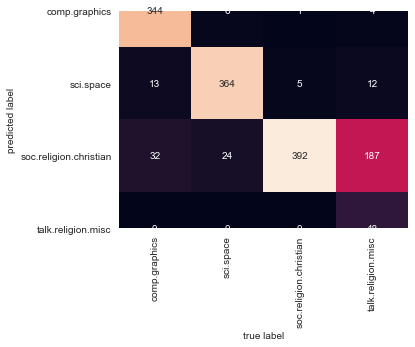

In [35]:
sns.heatmap(mat1.T, square=True, annot=True, fmt='d', cbar=False,
            xticklabels=train.target_names, yticklabels=train.target_names)
plt.xlabel('true label')
plt.ylabel('predicted label')
plt.show()

(4.0, 0.0)

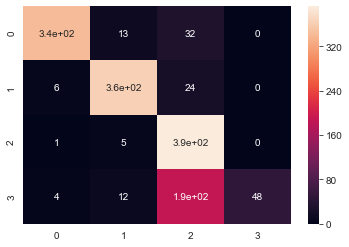

In [36]:
# If you run into this issue with top and bottom rows being cut off,
# it's because of a matplotlib version issue (Thanks StackOverflow!).
# You'll have to explicitly widen the y-axis, as below.

ax = sns.heatmap(mat1, annot=True) #notation: "annot" not "annote"
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)

In [37]:
tests = ['sending a payload to the ISS', 'I met Santa Claus once', "Bismillah al-rahman al-raheem",
         "Today is a good day to say hi to the Prophet Jesus on the international space station",
        "I hate trying to save pictures of in a .jpg format when .png looks so much better",
        "I hate trying to save pictures of the Prophet Mohammed in a .jpg format when .png looks so much better",
        "I hate trying to save pictures of the Prophet Jesus in a .jpg format when .png looks so much better"]
preds = model.predict(tests)
print(preds)

[1 2 1 2 0 0 2]


In [38]:
print(train.target_names[0])
print(train.target_names[1])
print(train.target_names[2])
print(train.target_names[3])

comp.graphics
sci.space
soc.religion.christian
talk.religion.misc
